<div style="text-align: center;">
    <h1>CS 715: Advanced Data Science & Machine Learning</h1>
    <h2>Assignment 3</h2>
    <h4>Kapeesh Kaul | 200487681</h4>
</div>


#### ` Please refer to the github link for complete code implementation:` [Github Repository](https://github.com/kapeesh-kaul/lstm_cnn)

## Q1. What is spatiotemporal data analysis? What role do LSTMs play in spatiotemporal forecasting? Provide an example where they are applied.

Spatiotemporal data analysis involves studying data that changes over both space and time. This type of analysis uncovers patterns and dependencies in datasets where information has a spatial dimension (e.g., location) and a temporal dimension (e.g., time). Common applications include weather prediction, traffic flow analysis, disease outbreak tracking, and financial markets.


### LSTMs  in Spatiotemporal Forecasting

LSTMs (Long Short-Term Memory networks) are a class of recurrent neural networks (RNNs) designed to model sequential dependencies and long-term patterns. They are particularly effective in handling the **temporal aspect** of spatiotemporal data. 

#### Key Contributions of LSTMs in Spatiotemporal Forecasting:
1. **Memory Cells and Gates**: Retain long-term dependencies while selectively forgetting irrelevant information.
2. **Sequential Dependencies**: Learn patterns over time, making them highly suitable for time-series data.
3. **Noise Handling**: Robust to fluctuations in temporal data, a common characteristic of spatiotemporal datasets.

When combined with spatial data (e.g., stock prices from multiple regions or weather data across different grid points), LSTMs can provide accurate predictions by focusing on temporal dependencies.


### Example Application: Forecasting Stock Prices Using LSTMs

An example of spatiotemporal forecasting is **predicting stock prices** using historical stock data. Stock price prediction involves a **temporal component** (price changes over time) and potentially a **spatial component** (interdependencies between multiple stocks or indices).

#### Context of the Example:
In the Python-based implementation, we trained an LSTM model to predict Apple Inc.'s stock prices using **Yahoo Finance historical data**. Here’s how the analysis aligns with spatiotemporal forecasting:
1. **Temporal Analysis**:
   - The model learns patterns in Apple's stock price over time.
   - It uses sequences of past prices to predict the next price.
2. **Spatial Potential**:
   - This could be extended to include multiple stocks or indices, capturing spatial relationships between different market entities.

#### Steps in the Example:
1. **Data Preparation**:
   - Historical stock prices are fetched and preprocessed.
   - Temporal sequences (e.g., 60 days of data) are created as input to the LSTM model.

2. **LSTM Training**:
   - The LSTM model learns temporal dependencies in stock price data.
   - The trained model uses these patterns to make predictions.

3. **Forecasting**:
   - The trained model predicts stock prices for future time points, providing insights into potential market movements.

In [1]:
import LSTM
from LSTM.train import TRAIN_CONFIG
LSTM.train(TRAIN_CONFIG)

[*********************100%***********************]  1 of 1 completed


Epoch [10/50], Loss: 0.0005
Epoch [20/50], Loss: 0.0002
Epoch [30/50], Loss: 0.0002
Epoch [40/50], Loss: 0.0001
Epoch [50/50], Loss: 0.0002
Model weights saved to lstm_model.pth


In [2]:
from LSTM.predict import PREDICT_CONFIG
LSTM.predict(PREDICT_CONFIG)

[*********************100%***********************]  1 of 1 completed

Model weights loaded from lstm_model.pth
Predictions saved to LSTM_predictions.csv


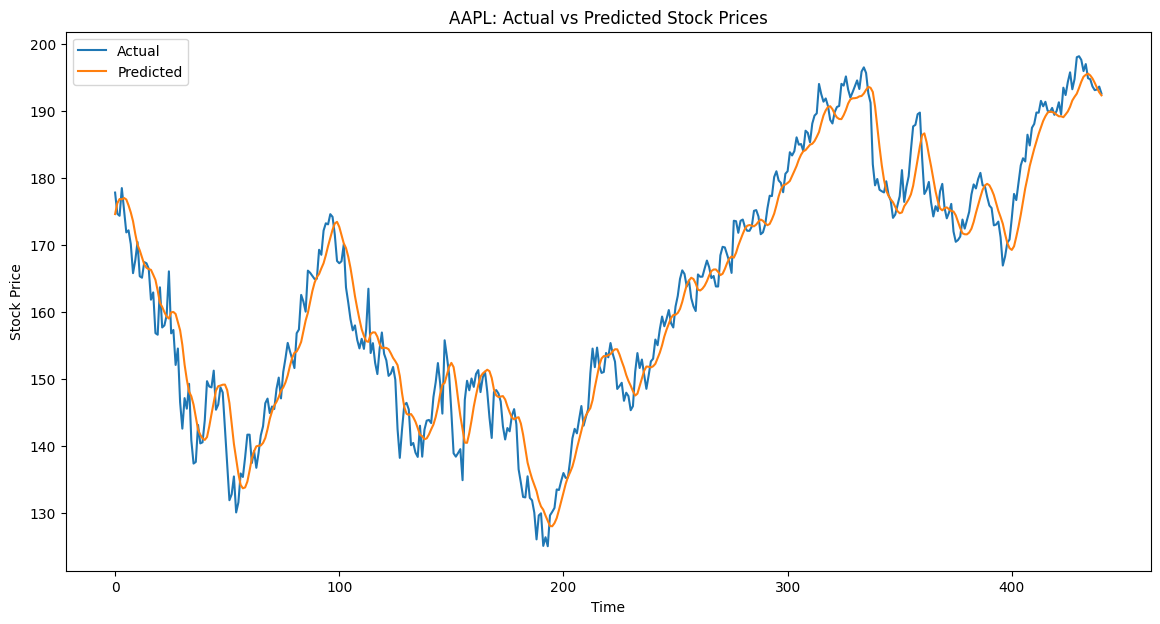

Mean Squared Error (MSE): 17.33432018513833
Mean Absolute Error (MAE): 3.3095564172335608
R-squared (R2): 0.9499336104499098


In [3]:
import pandas as pd
results = pd.read_csv('LSTM_predictions.csv')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(results['Actual'], label='Actual')
plt.plot(results['Predicted'], label='Predicted')
plt.title('AAPL: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate performance metrics
mse = mean_squared_error(results['Actual'], results['Predicted'])
mae = mean_absolute_error(results['Actual'], results['Predicted'])
r2 = r2_score(results['Actual'], results['Predicted'])

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

### Significance of LSTMs in the Example:
- **Long-Term Dependencies**: The LSTM captures trends and patterns over the 60-day historical window, enabling accurate future predictions.
- **Generalization**: While we used stock prices, the methodology can be applied to other spatiotemporal datasets, such as predicting temperature changes or traffic flow.


### Broader Application:
The same approach can be adapted for tasks like:
- **Weather Forecasting**: Predicting temperature and rainfall using spatiotemporal grids of weather data.
- **Traffic Prediction**: Analyzing traffic flow over time at different intersections or roads.
- **Healthcare**: Modeling disease spread over time and across geographic regions.

By leveraging LSTMs for the temporal component and combining it with spatial relationships, spatiotemporal data analysis can unlock valuable insights across diverse fields.

## Q2. Briefly explain how CNNs can be applied to spatiotemporal forecasting.
CNNs (Convolutional Neural Networks) offer a unique approach to spatiotemporal forecasting by focusing on spatial and local temporal dependencies in the data. Unlike LSTMs, which are explicitly designed to handle sequential dependencies over long time periods, CNNs excel at extracting patterns within fixed windows of input data, making them particularly effective for identifying localized trends.

### Application in Spatiotemporal Forecasting

1. **Capturing Local Temporal Patterns**: 
   - CNNs process time-series data by applying convolutional filters over a sequence of values (e.g., sliding windows of stock prices). This helps identify localized temporal features, such as spikes or trends, which can indicate short-term dynamics in the data.

2. **Efficiency in Processing Large Datasets**:
   - By operating on fixed-size input windows, CNNs are computationally efficient and can parallelize computations, making them suitable for processing large-scale spatiotemporal datasets.

3. **Scalability to Multivariate Data**:
   - CNNs can handle multivariate inputs by using multiple channels, capturing interdependencies between different variables (e.g., relationships between different stocks or regions in weather data).

4. **Robustness to Noise**:
   - Convolutional layers inherently emphasize significant features while downplaying noise, which is particularly advantageous when working with fluctuating time-series data, such as stock prices or traffic flow.

### When to Use CNNs in Spatiotemporal Forecasting

CNNs are well-suited for scenarios where:
- The focus is on **short-term patterns** or localized trends within a fixed temporal window.
- Spatial relationships dominate, or the temporal sequence can be treated as a "spatial-like" input (e.g., a grid of time-series data).
- Computational efficiency is critical for large datasets.

### Example Context: Stock Price Prediction
In stock price prediction, CNNs analyze overlapping windows of historical stock prices. Filters identify short-term trends, such as momentum shifts, and feed these features into fully connected layers to predict future prices. This approach can be extended to multivariate scenarios, where spatial relationships (e.g., dependencies between different indices) complement the temporal features.

While CNNs may not capture long-term dependencies as effectively as LSTMs, their strength lies in identifying meaningful, localized patterns, making them a valuable tool for spatiotemporal forecasting in dynamic and high-dimensional datasets.

In [4]:
import CNN
from CNN.train import TRAIN_CONFIG
CNN.train(TRAIN_CONFIG)

[*********************100%***********************]  1 of 1 completed


Epoch [10/50], Loss: 0.0012
Epoch [20/50], Loss: 0.0003
Epoch [30/50], Loss: 0.0003
Epoch [40/50], Loss: 0.0004
Epoch [50/50], Loss: 0.0002
Model weights saved to cnn_model.pth


In [5]:
from CNN.predict import PREDICT_CONFIG
CNN.predict(PREDICT_CONFIG)

[*********************100%***********************]  1 of 1 completed

Predictions saved to CNN_predictions.csv


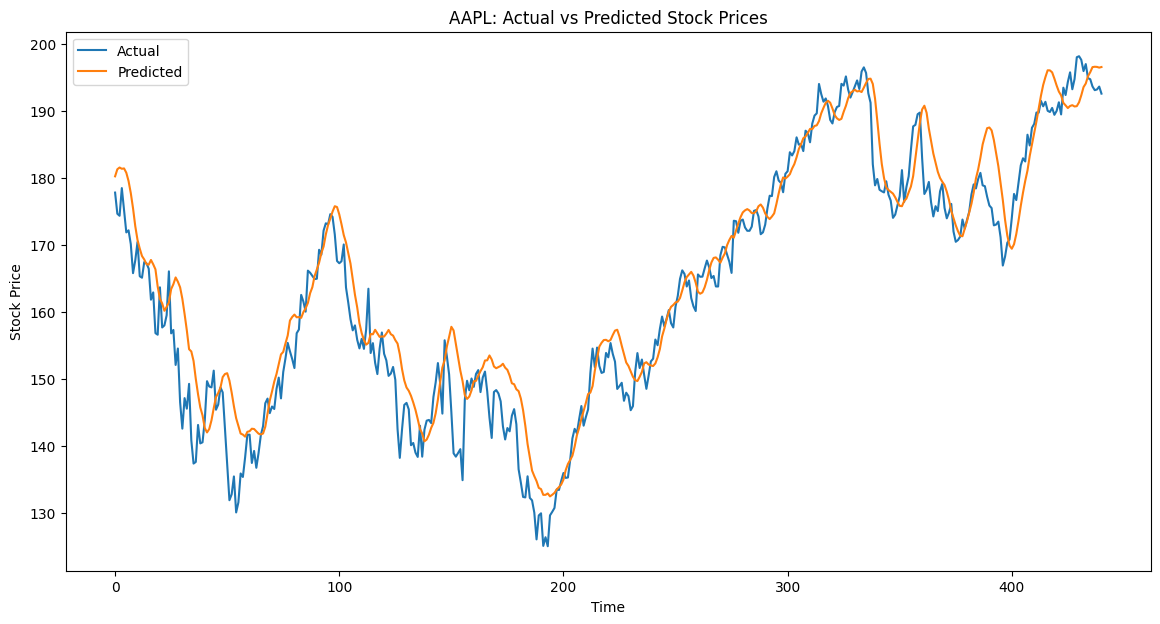

Mean Squared Error (MSE): 30.616855456530164
Mean Absolute Error (MAE): 4.15451850340136
R-squared (R2): 0.9115699147290666


In [6]:
import pandas as pd
results = pd.read_csv('CNN_predictions.csv')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(results['Actual'], label='Actual')
plt.plot(results['Predicted'], label='Predicted')
plt.title('AAPL: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate performance metrics
mse = mean_squared_error(results['Actual'], results['Predicted'])
mae = mean_absolute_error(results['Actual'], results['Predicted'])
r2 = r2_score(results['Actual'], results['Predicted'])

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

## 3. Imagine you are working on a project that involves building a text classification model for classifying news articles. Walk through the steps you would take from data collection and preprocessing to model evaluation and tuning. Which techniques and models would you consider, and why?

### Building a Text Classification Model for News Articles

When working on a text classification project to classify news articles, the process begins with data collection and spans multiple stages, including preprocessing, model development, evaluation, and tuning. The ultimate goal is to build an accurate and efficient model that can classify articles into predefined categories like politics, sports, or technology. Here's a walkthrough of how such a project could be approached.


### Data Collection and Preparation

The first step is collecting a diverse and labeled dataset of news articles. These can be sourced from APIs like NewsAPI or publicly available datasets such as AG News. The dataset should include both text (e.g., article content or headlines) and labels for categories.

Before feeding the data into the model, preprocessing is essential. This involves cleaning the text by removing special characters, HTML tags, and stopwords, converting text to lowercase, and performing tokenization to split the text into smaller components like words or subwords. Depending on the approach, the text can then be transformed into numerical representations using techniques like TF-IDF for traditional methods or embeddings like Word2Vec or BERT for deep learning.


### Exploratory Data Analysis (EDA)

Once the data is prepared, exploratory analysis provides valuable insights into its structure. For instance, understanding the distribution of classes helps identify imbalances, while visualizations like word clouds or term frequency plots reveal common terms in each category. These insights guide preprocessing choices and inform model selection.


### Model Development

For the model itself, various techniques can be considered based on the project's complexity and goals. A simple logistic regression model using TF-IDF features can serve as a strong baseline. However, for richer feature extraction and better performance, deep learning models are often the preferred choice.

Recurrent Neural Networks (RNNs) like LSTMs or GRUs are effective at capturing sequential dependencies in text, while Convolutional Neural Networks (CNNs) excel at identifying local patterns in word sequences. More recently, transformer-based models like BERT or DistilBERT have become state-of-the-art for text classification tasks. These models leverage pre-trained language representations to encode context and semantic relationships, making them highly effective for capturing nuanced text features in news articles.


### Training and Evaluation

The data is typically split into training, validation, and test sets to evaluate the model's performance. During training, regularization techniques like dropout are applied to prevent overfitting. Metrics such as accuracy, precision, recall, and F1-score are used to assess the model's performance, especially in scenarios where class imbalances exist. A confusion matrix can further reveal patterns in misclassification, offering insights for model improvement.


### Hyperparameter Tuning and Optimization

Improving model performance often involves tuning hyperparameters like learning rate, batch size, and the number of layers in deep learning models. Techniques like grid search or random search can be employed, and more advanced methods like Bayesian optimization or tools such as Optuna can automate the process. Early stopping based on validation performance is another useful strategy to ensure efficient training.


### Deployment and Monitoring

After achieving satisfactory performance, the model is deployed using frameworks like Flask or FastAPI, potentially on cloud platforms like AWS or Google Cloud for scalability. Continuous monitoring is essential to track model performance on live data and detect potential issues like concept drift, where the relationship between features and labels changes over time. Retraining the model periodically ensures that it remains accurate and effective.


### Choosing Techniques and Models

The choice of techniques depends on the project requirements. Baseline models like logistic regression are quick to implement and offer interpretable results, making them ideal for initial benchmarks. Deep learning models like LSTMs, CNNs, or BERT are better suited for complex datasets with rich semantic relationships, providing higher accuracy at the cost of computational complexity. Transformers, in particular, stand out for their ability to capture context and long-term dependencies in text, making them the preferred choice for modern text classification tasks.

By following this structured approach, the project transitions smoothly from data preparation to model deployment, resulting in a robust and scalable text classification solution.

## Q4. Create 5-10 quiz questions on the topics of reinforcement learning, deep learning, spatiotemporal forecasting, and natural language processing. The question types include multiple choice questions, true or false, and matching. 

### Quiz Questions
---

**Question:** In reinforcement learning, what is the primary objective of an agent?
- A) Minimize the immediate reward
- B) Maximize the cumulative reward over time
- C) Maximize the immediate reward
- D) Find the shortest path in a graph

**Answer:** B) Maximize the cumulative reward over time

---

**Question:** In reinforcement learning, exploration always provides better results than exploitation.
- True
- False

**Answer:** False

---

**Question:** Which of the following activation functions is most likely to cause the vanishing gradient problem?
- A) ReLU
- B) Sigmoid
- C) Tanh
- D) Leaky ReLU

**Answer:** B) Sigmoid

---

**Question:** Match the following deep learning architectures with their common application:
<div align = "center">
    <table>
        <tr>
            <td> 1. Convolutional Neural Network (CNN)  </td><td>A) Time-series forecasting  </td>
        </tr>
        <tr>
            <td>2. Recurrent Neural Network (RNN)</td><td>B) Image recognition</td>
        </tr>
        <tr>
            <td>3. Transformer</td><td>C) Language modeling </td>
        </tr>
        <tr>
            <td>4. Autoencoder</td><td>D) Data compression</td>
        </tr>
    </table>
</div>

**Answer:**
- 1 → B) Image recognition  
- 2 → A) Time-series forecasting  
- 3 → C) Language modeling  
- 4 → D) Data compression  

---

**Question:** Which technique is most commonly used to model long-term dependencies in spatiotemporal data?
- A) Logistic Regression
- B) LSTMs
- C) k-Nearest Neighbors
- D) Naive Bayes

**Answer:** B) LSTMs

---

**Question:** Spatiotemporal data involves both a spatial and a temporal dimension.
- True
- False

**Answer:** True

---

**Question:** What is the main purpose of the attention mechanism in transformer models like BERT?
- A) Reduce computation time
- B) Provide interpretability by aligning input and output
- C) Focus on important parts of the input sequence
- D) Encode positional information of words

**Answer:** C) Focus on important parts of the input sequence

---

**Question:** Match the following terms with their definitions:

<div align = "center">
    <table>
        <tr>
            <td> 1. Tokenization  </td><td>A) Reducing words to their base or root form  </td>
        </tr>
        <tr>
            <td>2. Lemmatization</td><td>B) Dividing text into smaller units like words or subwords</td>
        </tr>
        <tr>
            <td>3. Word Embedding</td><td>C) Mapping words to continuous vector representations </td>
        </tr>
        <tr>
            <td>4. Sequence-to-Sequence Model</td><td>D) Converting an input sequence to an output sequence</td>
        </tr>
    </table>
</div>

**Answer:**
- 1 → B) Dividing text into smaller units like words or subwords  
- 2 → A) Reducing words to their base or root form  
- 3 → C) Mapping words to continuous vector representations  
- 4 → D) Converting an input sequence to an output sequence  

---

**Question:** Pre-trained models like BERT and GPT must always be trained from scratch for new NLP tasks.
- True
- False

**Answer:** False

---

**Question:** Which concept is shared between reinforcement learning and deep learning?
- A) Backpropagation
- B) Policy Gradient
- C) Non-linear activation functions
- D) Neural networks

**Answer:** D) Neural networks